In [1]:
import os
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from MachineLearningUtils import plot_confustion_matrix, error_rate

# import data

In [2]:
df = pd.read_pickle('./data/df_train.pkl.gzip', compression = 'gzip')

In [3]:
df.head()

,label,target,trace_id,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_travel_sec,s_arrival_sample,source_origin_time,source_latitude,source_longitude,source_depth_km,snr_db_E,snr_db_N,snr_db_Z,E,N,Z
1,Near_Small,1,trace_1,33.598182,-116.596005,1374.8,500.0,7.39588,1833.0,2017-10-12 02:55:02.969,35.561667,-116.5697,13.92,39.799999,41.599998,39.500000,"[0.0, 3.884492e-05, 0.00037855064, 0.002025907...","[-0.0, -0.00013965365, 0.00040082424, -0.00251...","[0.0, 0.00020642515, -0.00026392427, 0.0005670..."
2,Far_Medium,5,trace_2,33.655160,-115.990060,538.0,800.0,8.64000,2055.2,2012-05-29 21:39:41.030,69.509000,-116.3350,5.56,22.900000,28.299999,22.299999,"[-0.0, 0.007055464, 0.02053014, -0.08816139, -...","[0.0, 0.0045861118, -0.013594023, -0.06492513,...","[0.0, 0.010553602, 0.04499443, 0.07075505, -0...."
4,Near_Medium,2,trace_4,19.333395,-155.385650,836.0,900.0,7.77000,1401.0,2018-04-23 03:03:17.385,33.075200,73.6821,9.41,12.600000,22.000000,18.299999,"[0.0, 0.00087343936, 0.001654511, 0.003251037,...","[-0.0, -0.0024113357, -0.0057321144, -0.017913...","[-0.0, -0.00079455395, -0.0040257163, -0.01145..."
5,Far_Small,4,trace_5,35.935700,-117.601700,1042.6,800.0,2.68000,1416.0,2013-03-11 16:56:06.060,38.612300,-122.6970,118.79,30.600000,29.100000,33.000000,"[-0.0, -0.00044424256, -0.00061723316, -0.0027...","[0.0, 2.6028414e-05, -0.00040918458, 0.0047532...","[0.0, 0.00034063237, 0.0003412804, 0.000484175..."
6,Noise,0,trace_6,64.564600,-165.373200,338.0,697.2,1.41000,674.0,2018-01-05 13:16:17.060,60.036800,-155.2055,2.17,47.099998,18.100000,49.400002,"[-0.0, -0.0059266915, -0.01604839, -0.04224359...","[-0.0, -0.0059266915, -0.01604839, -0.04224359...","[-0.0, -0.0059266915, -0.01604839, -0.04224359..."


In [4]:
df.shape

(12308, 19)

# Prepare & Check data 

In [5]:
X = df.drop(['label','target','trace_id','E','N','Z'],axis=1)
Y = df['target']

print('X : ')
print(X.count())
print()
print('Y: ')
print(Y.count())

Y_labels = Y
Y_count_labels = len(set(Y))

print()
print('Distinct classes :', Y_count_labels)

X : 
receiver_latitude       12308
receiver_longitude      12308
receiver_elevation_m    12308
p_arrival_sample        12308
p_travel_sec            12308
s_arrival_sample        12308
source_origin_time      12308
source_latitude         12308
source_longitude        12308
source_depth_km         12308
snr_db_E                12308
snr_db_N                12308
snr_db_Z                12308
dtype: int64

Y: 
12308

Distinct classes : 7


# Train-Test Split

In [6]:
X_train = pd.read_pickle('./data/df_train.pkl.gzip', compression='gzip').drop(['label','target','trace_id','E','N','Z','source_origin_time'],axis=1).dropna()
X_test = pd.read_pickle('./data/df_test.pkl.gzip', compression='gzip').drop(['label','target','trace_id','E','N','Z','source_origin_time'],axis=1).dropna()
y_train = pd.read_pickle('./data/df_train.pkl.gzip', compression='gzip')['target']
y_test = pd.read_pickle('./data/df_test.pkl.gzip', compression='gzip')['target']

In [7]:
print('X_train : ')
print(X_train.count())
print()
print('Y_train: ')
print(y_train.size)
print()
print('X_test: ')
print(X_test.count())
print()
print('Y_test: ')
print(y_test.size)

X_train : 
receiver_latitude       12308
receiver_longitude      12308
receiver_elevation_m    12308
p_arrival_sample        12308
p_travel_sec            12308
s_arrival_sample        12308
source_latitude         12308
source_longitude        12308
source_depth_km         12308
snr_db_E                12308
snr_db_N                12308
snr_db_Z                12308
dtype: int64

Y_train: 
12308

X_test: 
receiver_latitude       3078
receiver_longitude      3078
receiver_elevation_m    3078
p_arrival_sample        3078
p_travel_sec            3078
s_arrival_sample        3078
source_latitude         3078
source_longitude        3078
source_depth_km         3078
snr_db_E                3078
snr_db_N                3078
snr_db_Z                3078
dtype: int64

Y_test: 
3078


# Random Forest Classifier
##  Modelling

In [8]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, verbose=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## Error Rate

In [9]:
error_rate(y_test, y_pred)

0.5315139701104613

## Classification Report

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       439
           1       0.41      0.47      0.44       439
           2       0.56      0.30      0.39       440
           3       0.53      0.78      0.63       440
           4       0.47      0.60      0.53       440
           5       0.31      0.20      0.24       440
           6       0.29      0.24      0.26       440

    accuracy                           0.47      3078
   macro avg       0.46      0.47      0.45      3078
weighted avg       0.46      0.47      0.45      3078



## Confusion Matrix

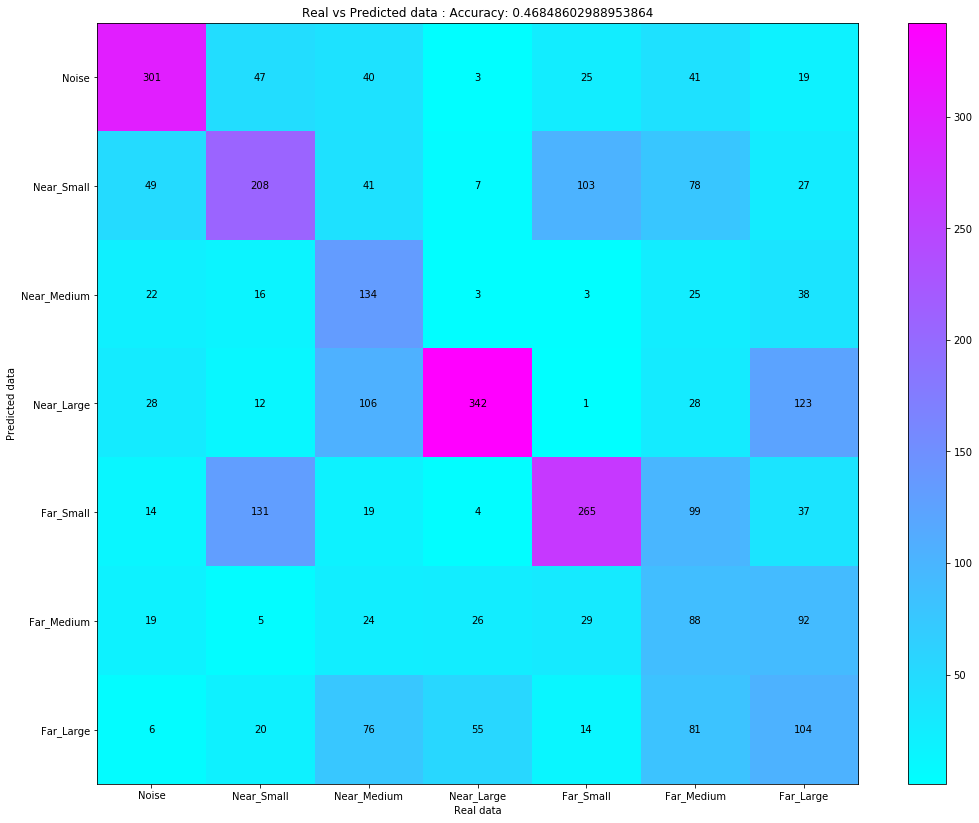

In [11]:
plot_confustion_matrix(y_test, y_pred, df,prob=False)

## Feature Importance

In [12]:
rf.feature_importances_

array([0.12758244, 0.22579072, 0.09461504, 0.00682095, 0.0066208 ,
       0.01079998, 0.00967297, 0.01015601, 0.0063314 , 0.16412612,
       0.18918353, 0.14830004])

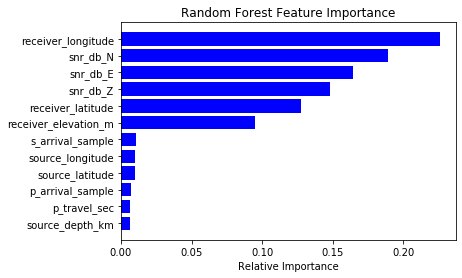

In [13]:
features = X_train.columns.tolist()
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Random Forest Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()